In [0]:
from keras.datasets import mnist
from keras.layers import *
from keras.models import Sequential,Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math


Using TensorFlow backend.


In [0]:
(X_train,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

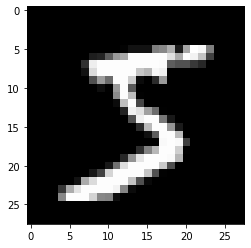

In [0]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [0]:
#Normalize the data in range(-1,1)]
X_train= (X_train.astype('float32')-127.5)/127.5


In [0]:
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [0]:
total_epochs=50
batch_size=256
no_of_batches=int(X_train.shape[0]/batch_size)
half_batch=126
noise_dim = 100 #upsample to 784dim vector
adam=Adam(lr=2e-4,beta_1=0.5)


In [0]:
#generator
#input is a noise vector(100dim) and builds a o/p vector(784dim)

generator = Sequential()
generator.add(Dense(256,input_shape=(noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=adam)

generator.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_____________________

In [0]:
#Downsampling
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
#GAN(step-2)
discriminator.trainable=False
gan_input=Input(shape=(noise_dim,))
generated_img=generator(gan_input)
gan_output=discriminator(generated_img)

#functional API
model =Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [0]:
X_train=X_train.reshape(-1,784)
print(X_train.shape)

(60000, 784)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Discriminator Loss 0.5835 Generator Loss 1.2578
Epoch 2 Discriminator Loss 0.5764 Generator Loss 1.2765
Epoch 3 Discriminator Loss 0.5861 Generator Loss 1.2475
Epoch 4 Discriminator Loss 0.6115 Generator Loss 1.1634
Epoch 5 Discriminator Loss 0.6249 Generator Loss 1.1147


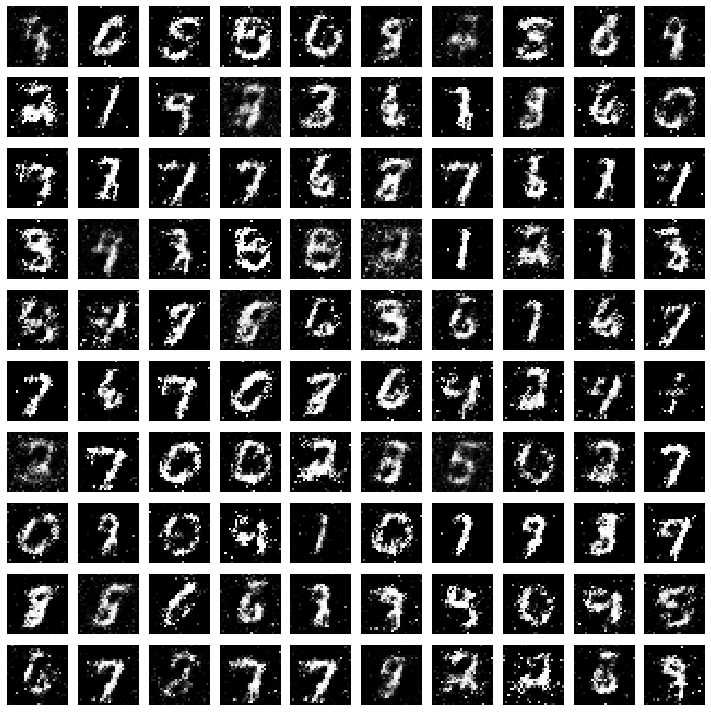

Epoch 6 Discriminator Loss 0.6287 Generator Loss 1.0789
Epoch 7 Discriminator Loss 0.6329 Generator Loss 1.0711
Epoch 8 Discriminator Loss 0.6377 Generator Loss 1.0464
Epoch 9 Discriminator Loss 0.6428 Generator Loss 1.0285
Epoch 10 Discriminator Loss 0.6436 Generator Loss 1.0242


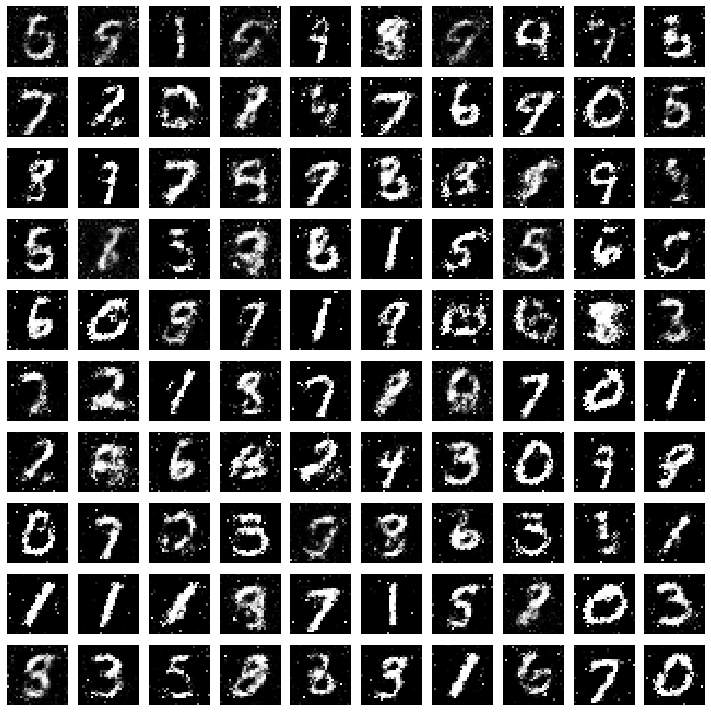

Epoch 11 Discriminator Loss 0.6453 Generator Loss 1.0321
Epoch 12 Discriminator Loss 0.6445 Generator Loss 1.0251
Epoch 13 Discriminator Loss 0.6437 Generator Loss 1.0297
Epoch 14 Discriminator Loss 0.6479 Generator Loss 1.0152
Epoch 15 Discriminator Loss 0.6450 Generator Loss 1.0306


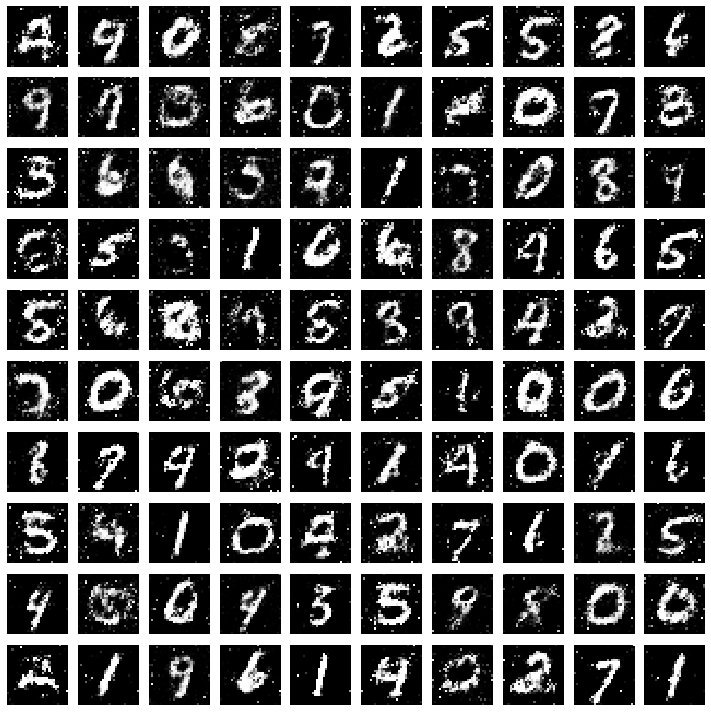

Epoch 16 Discriminator Loss 0.6492 Generator Loss 1.0162
Epoch 17 Discriminator Loss 0.6479 Generator Loss 1.0260
Epoch 18 Discriminator Loss 0.6488 Generator Loss 1.0195
Epoch 19 Discriminator Loss 0.6519 Generator Loss 1.0118
Epoch 20 Discriminator Loss 0.6531 Generator Loss 1.0131


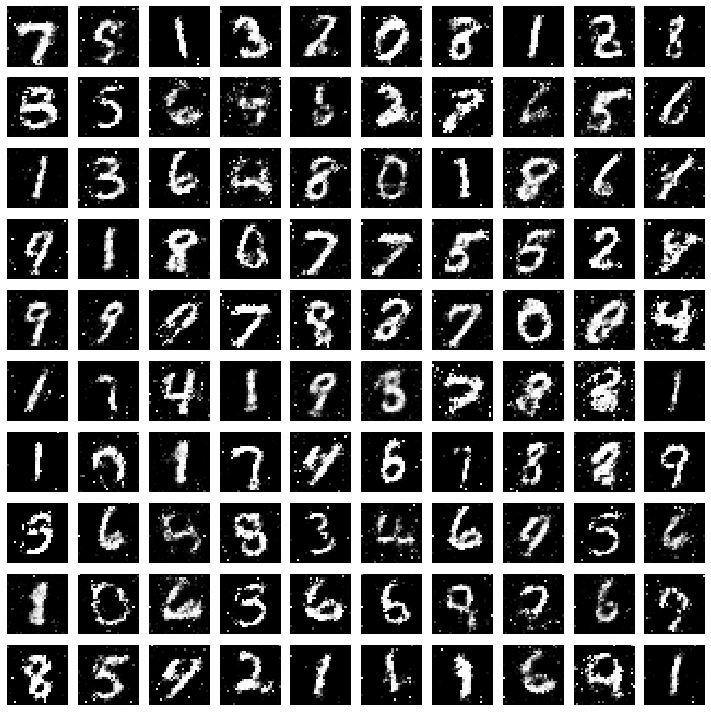

Epoch 21 Discriminator Loss 0.6548 Generator Loss 1.0127
Epoch 22 Discriminator Loss 0.6548 Generator Loss 1.0043
Epoch 23 Discriminator Loss 0.6581 Generator Loss 0.9944
Epoch 24 Discriminator Loss 0.6568 Generator Loss 0.9985
Epoch 25 Discriminator Loss 0.6599 Generator Loss 0.9976


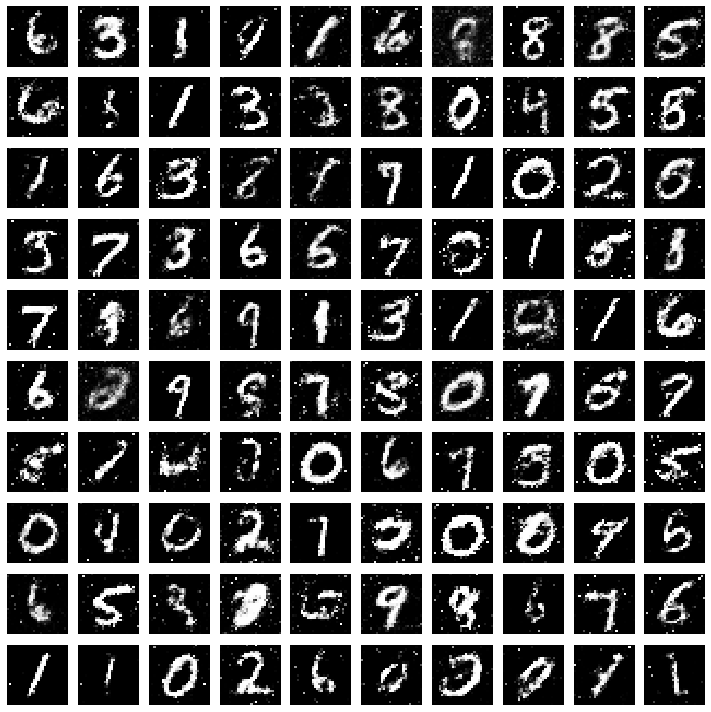

Epoch 26 Discriminator Loss 0.6579 Generator Loss 0.9946
Epoch 27 Discriminator Loss 0.6584 Generator Loss 0.9876
Epoch 28 Discriminator Loss 0.6589 Generator Loss 1.0015
Epoch 29 Discriminator Loss 0.6606 Generator Loss 0.9952
Epoch 30 Discriminator Loss 0.6602 Generator Loss 0.9919


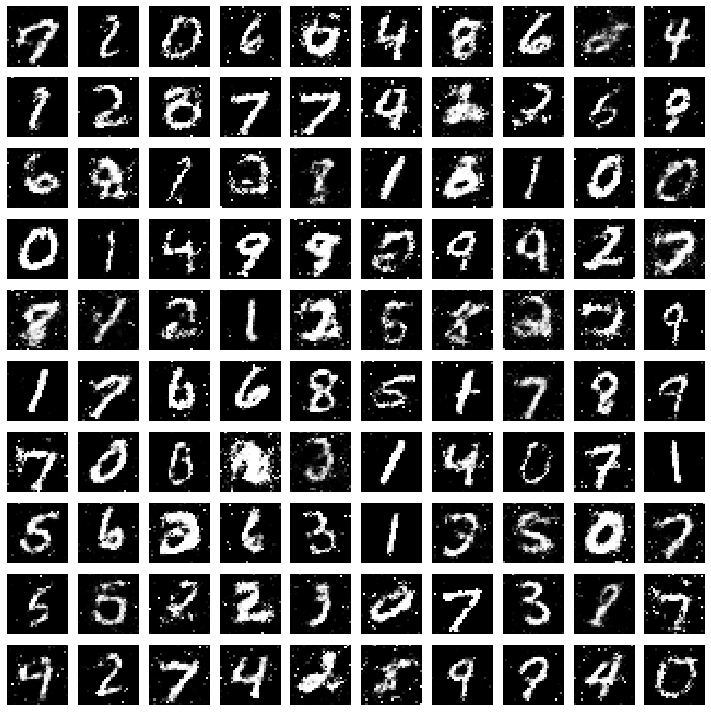

Epoch 31 Discriminator Loss 0.6606 Generator Loss 0.9967
Epoch 32 Discriminator Loss 0.6598 Generator Loss 0.9988
Epoch 33 Discriminator Loss 0.6618 Generator Loss 0.9883
Epoch 34 Discriminator Loss 0.6611 Generator Loss 0.9908
Epoch 35 Discriminator Loss 0.6619 Generator Loss 0.9922


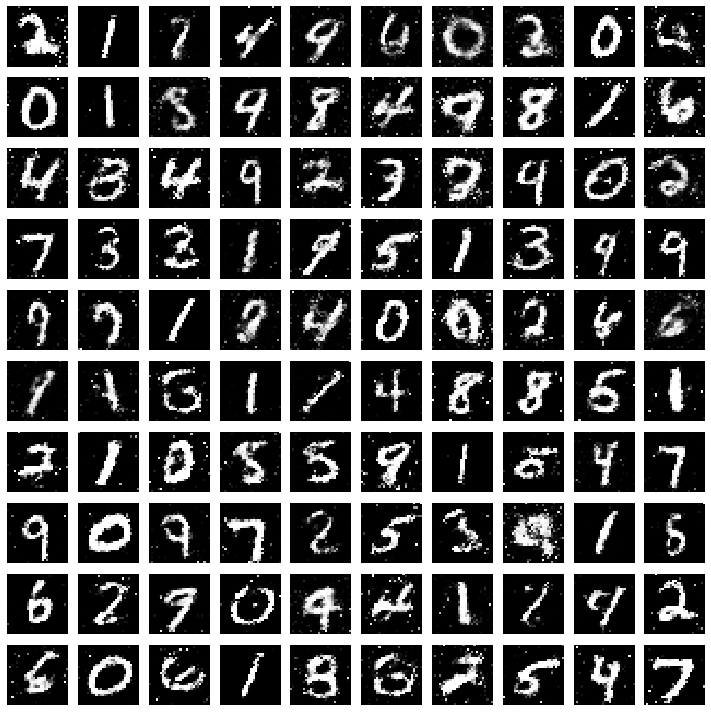

Epoch 36 Discriminator Loss 0.6617 Generator Loss 0.9959
Epoch 37 Discriminator Loss 0.6603 Generator Loss 0.9969
Epoch 38 Discriminator Loss 0.6609 Generator Loss 0.9959
Epoch 39 Discriminator Loss 0.6610 Generator Loss 0.9939
Epoch 40 Discriminator Loss 0.6603 Generator Loss 0.9983


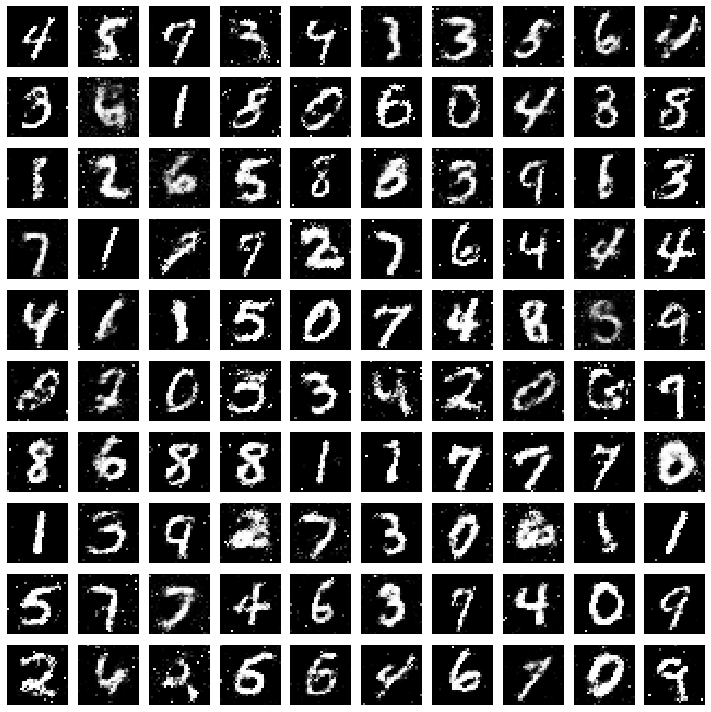

Epoch 41 Discriminator Loss 0.6628 Generator Loss 0.9967
Epoch 42 Discriminator Loss 0.6606 Generator Loss 1.0016
Epoch 43 Discriminator Loss 0.6647 Generator Loss 0.9892
Epoch 44 Discriminator Loss 0.6633 Generator Loss 0.9910
Epoch 45 Discriminator Loss 0.6615 Generator Loss 0.9939


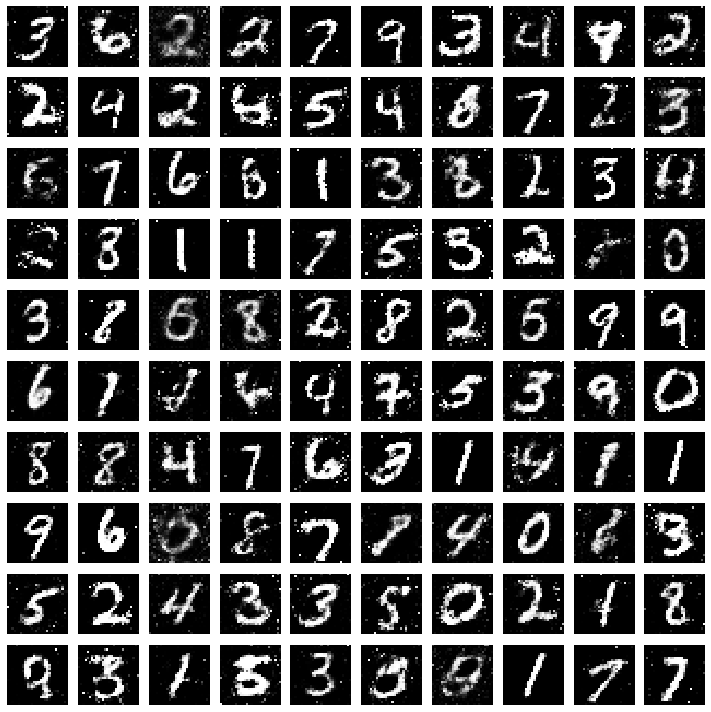

Epoch 46 Discriminator Loss 0.6634 Generator Loss 0.9958
Epoch 47 Discriminator Loss 0.6612 Generator Loss 0.9998
Epoch 48 Discriminator Loss 0.6625 Generator Loss 0.9956
Epoch 49 Discriminator Loss 0.6617 Generator Loss 0.9941
Epoch 50 Discriminator Loss 0.6622 Generator Loss 0.9915


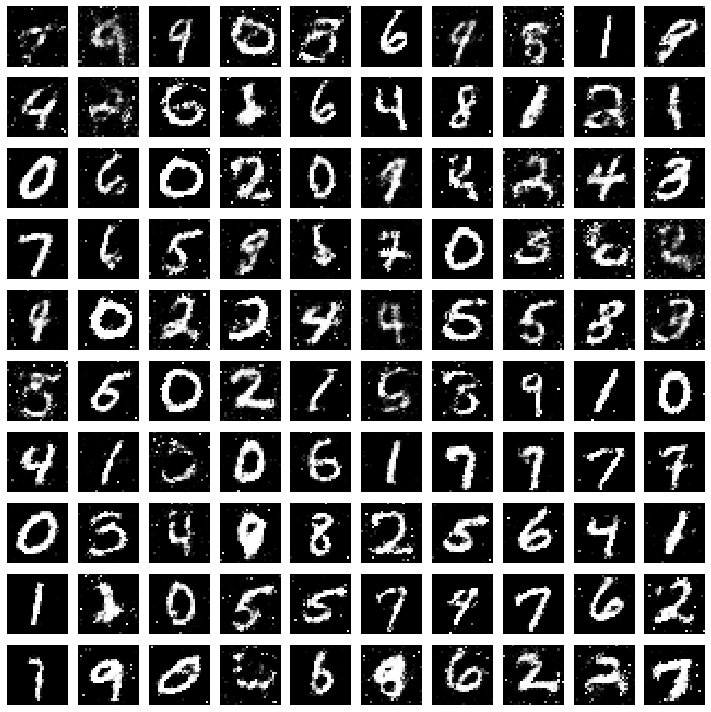

In [0]:
#Training loop
d_losses=[]
g_losses=[]
for epoch in range(total_epochs):
  epoch_d_loss=0.
  epoch_g_loss=0.
  #Mini Batch SGD
  for step in range(no_of_batches):
    #Step-1 :Discriminator
    #50%real data+50%fake data

    #REal Data
    idx=np.random.randint(0,X_train.shape[0],half_batch)
    real_imgs=X_train[idx]
    #FAke Data
    noise=np.random.normal(0,1,size=(half_batch,noise_dim))
    fake_imgs=generator.predict(noise) #forward

    #labels
    real_y=np.ones((half_batch,1))*0.9 #one sided label smoothening for discriminator
    fake_y=np.zeros((half_batch,1))
    #Train our Discriminator
    d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_loss_real+0.5*d_loss_fake

    epoch_d_loss+=d_loss


    #Train Generator (Considering frozen Discriminator)

    noise =np.random.normal(0,1,size=(batch_size,noise_dim))
    ground_truth_y=np.ones((batch_size,1))
    g_loss= model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss+=g_loss
  print("Epoch %d Discriminator Loss %.4f Generator Loss %.4f"%((epoch+1),epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))
  d_losses.append(epoch_d_loss/no_of_batches)
  g_losses.append(epoch_g_loss/no_of_batches)
  if (epoch+1)%5==0:
    generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
    save_images(epoch)



In [0]:
!mkdir images

In [0]:
!ls

images	model  sample_data


In [0]:
def save_images(epoch,samples=100):
  noise=np.random.normal(0,1,size=(samples,noise_dim))
  generated_imgs=generator.predict(noise)
  generated_imgs=generated_imgs.reshape(samples,28,28)

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')

  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{}.png'.format(epoch+1))
  plt.show()

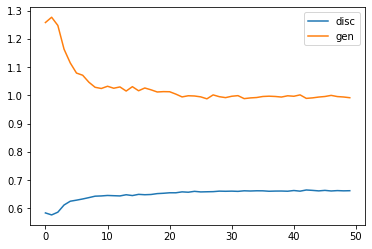

In [0]:
plt.plot(d_losses,label='disc')
plt.plot(g_losses,label='gen')
plt.legend()
plt.show()